# SYS 611: Conditional Exponential Distribution

Paul T. Grogan <pgrogan@stevens.edu>

This example illustrates the Markov property for an exponential distribution.

## Dependencies

This example is compatible with Python 2 environments through use of the `__future__` library function. Additionally, this example uses the `numpy`, `scipy.stats`, and `matplotlib.pyplot` libraries.

In [1]:
# import the python3 behavior for importing, division, and printing in python2
from __future__ import absolute_import, division, print_function

# import the numpy package and refer to it as `np`
import numpy as np
# import the matplotlib.pyplot package and refer to it as `plt`
import matplotlib.pyplot as plt
# import the scipy.stats package and refer to it as `stats`
import scipy.stats as stats

## Samples from an Exponential Distribution

Use the built-in exponential process generator in NumPy to generate samples. Plot a histogram of the observed samples and compare it to the theoretical PDF.

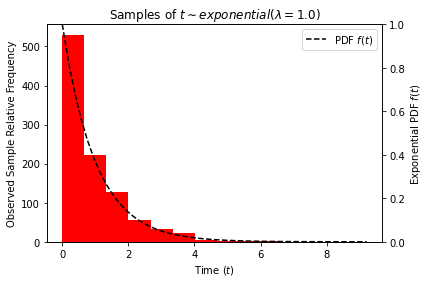

In [9]:
_lambda = 1.0 # average event rate (things per time)

# define number of samples and use built-in process generator
num_samples = 1000
samples = np.random.exponential(scale=1/_lambda, size=num_samples)

# create plot
fig, ax1 = plt.subplots()
# plot histogram of samples
plt.hist(samples, color='r')
# create a second plotting axis
ax2 = ax1.twinx()
ax2.set_ylim([0,_lambda])
# plot the PDF of the generating distribution up to the 99.99th percentile point
t = np.linspace(0,stats.expon.ppf(0.9999, scale=1/_lambda))
ax2.plot(t, stats.expon.pdf(t, scale=1/_lambda), '--k', label='PDF $f(t)$')
# add title and labels
plt.title('Samples of $t\sim{{exponential}}(\lambda={:.1f})$'.format(_lambda))
ax1.set_xlabel('Time ($t$)')
ax1.set_ylabel('Observed Sample Relative Frequency')
ax2.set_ylabel('Exponential PDF $f(t)$')
plt.legend(loc='best')
plt.show()

## Conditional Distribution

Select only the samples that exceed a specified cutoff threshold. Plot a histogram of the conditional samples and compare it to the theoretical PDF. Note that the conditional samples still follow an exponential distribution, just offset by the cutoff time.

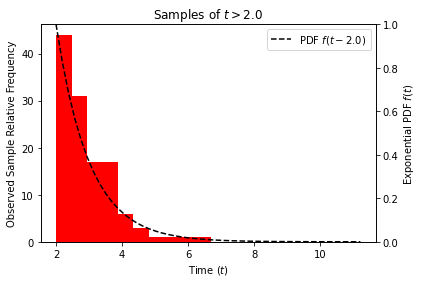

In [10]:
# define the cutoff time for conditional samples
cutoff_time = 2.0

# filter the samples to show only those that exceed the cutoff time
conditional_samples = samples[samples > cutoff_time]

# create plot
fig, ax1 = plt.subplots()
# plot histogram of samples after cutoff time
plt.hist(conditional_samples, color='r')
# create a second plotting axis
ax2 = ax1.twinx()
ax2.set_ylim([0,_lambda])
# plot the PDF of the generating distribution up to the 99.99th percentile point
t = np.linspace(0,stats.expon.ppf(0.9999, scale=1/_lambda))
ax2.plot(t+cutoff_time, stats.expon.pdf(t, scale=1/_lambda), '--k', label='PDF $f(t-{:.1f})$'.format(cutoff_time))
# add title and labels
plt.title('Samples of $t>{:.1f}$'.format(cutoff_time))
ax1.set_xlabel('Time ($t$)')
ax1.set_ylabel('Observed Sample Relative Frequency')
ax2.set_ylabel('Exponential PDF $f(t)$')
plt.legend(loc='best')
plt.show()